# Import : by GitHub

You can try this code in Colab by this method.  

In [68]:
!git clone https://github.com/KanghwaSisters/24_2_mainSession.git

fatal: destination path '24_2_mainSession' already exists and is not an empty directory.


In [69]:
import os
os.chdir('/content/24_2_mainSession/4주차/env')

In [70]:
! python GridWorldEnvironment.py

In [71]:
from GridWorldEnvironment import GridWorldEnvironment

In [72]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           gridworld_size=(5,5))

# SARSA Class

In [73]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

class SARSAgent:
    def __init__(self, actions):
        self.actions = actions
        self.step_size = 0.01 # 스텝사이즈 고정
        self.discount_factor = 0.9
        self.epsilon = 0.1 # 입실론-탐욕 정책
        self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0]) # 큐함수 테이블 생성 및 기본값 설, dictionary 자료형?

    # <s, a, r, s', a'>를 통해 큐함수 업데이트
    def learn(self, state, action, reward, next_state, next_action):
        state, next_state = tuple(state), tuple(next_state)
        current_q = self.q_table[state][action]
        next_state_q = self.q_table[next_state][next_action]
        td = reward + self.discount_factor * next_state_q - current_q # (r + gamma * q' - q) 시간차 에러?
        new_q = current_q + self.step_size * td
        self.q_table[state][action] = new_q

    # 입시론-탐욕 정책에 따라 행동 반환
    def get_action(self, state):
        if np.random.rand() < self.epsilon: # 다른 방법은 없을까?
            # 무작위 행동 반환
            action = np.random.choice(range(len(self.actions))) # 행동의 정수 인덱스 반환
        else:
            state = tuple(state)
            # tuple으로 바꾸는 이유는? -> 이 환경에서는 state가 list이기 때문에 dictionary의 key 값으로 사용하기 위
            q_list = self.q_table[state]
            action = arg_max(q_list) # 밑에서 함수 정의
        return action

# 큐함수에 따라 최적 행동 반환
def arg_max(q_list):
    max_idx_list = np.argwhere(q_list == np.amax(q_list))
    max_idx_list = max_idx_list.flatten().tolist()
    return random.choice(max_idx_list)


# Main

- **SARSA**를 이용해 그리드 월드 학습시키기  
- 학습 지표 시각화

In [74]:
if __name__ == "__main__":
    agent = SARSAgent(actions=env.action_space)

    num_episodes = 1000
    steps_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        # 1. 현재 상태에서 입실론-탐욕 정책에 따라 행동
        action = agent.get_action(state) # 입실론-탐욕 정책에 따라 행동

        step_count = 0

        while True:
            #env.render()

            # 2. 환경으로부터 다음 상태, 보상, 종료 여부를 받음
            next_state, reward, done = env.step(action)
            # 3. 다음 상태에서의 행동 선택
            next_action = agent.get_action(next_state)
            # 4. <s, a, r, s', a'>로 큐함수 업데이트
            agent.learn(state, action, reward, next_state, next_action)

            state = next_state
            action = next_action # 다음 상태에 대해서도 반복할 준비

            step_count += 1


            # 모든 상태의 큐함수 출력
            pass

            if done: # if done == True
                break

        steps_per_episode.append(step_count)

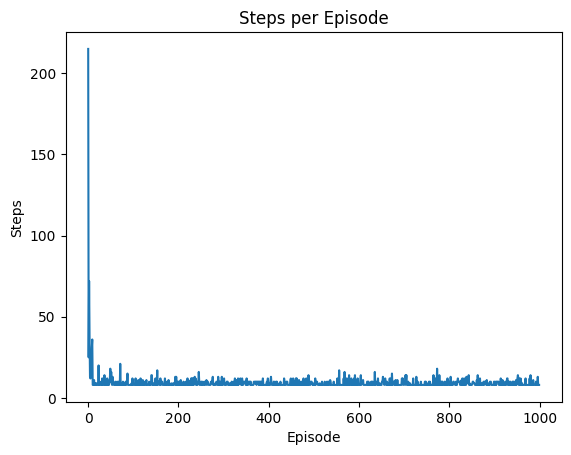

In [76]:
plt.plot(range(num_episodes), steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode')
plt.show()